In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("D:\My work world\AI Mafia\dataset\digit_reco_train.csv")
df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(42000, 785)

In [4]:
data = df.values
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
x = data[:,1:]
y = data[:,0]
print(x)
print(x.shape,y.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(42000, 784) (42000,)


In [17]:
split = int(0.8*x.shape[0])
# print(split)
x_train = x[:split,:]
y_train = y[:split]

x_test = x[split:,:]
y_test = y[split:]
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


In [18]:
def drawImage(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show

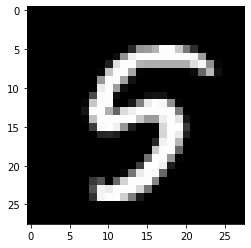

In [23]:
drawImage(x_train[8])

In [24]:
y_train[8]

5

In [25]:
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [37]:
def KNN(x,y,to_pred,k=5):
    vals = []
    n = x.shape[0]
    for i in range(n):
        d = distance(to_pred,x[i])
        vals.append((d,y[i]))
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    
#     print(vals)
    new_vals = np.unique(vals[:,1],return_counts=True)
#     print(new_vals)
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    return pred

In [38]:
pred = KNN(x_train,y_train,x_test[1])
int(pred)

7

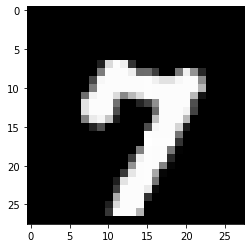

In [36]:
drawImage(x_test[1])